<a href="https://colab.research.google.com/github/Sanja2000/Project/blob/main/E_Commerce_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**E COMMERCE CUSTOMER SEGMENTATION**

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("data.csv", encoding=('ISO-8859-1'),low_memory =False)

In [60]:
import warnings
warnings.filterwarnings("ignore")

In [61]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [62]:
df.shape

(541909, 8)

copying the original dataset for further opertions

In [63]:
dforiginal=df.copy()

Dropping the duplicates in the description column

In [64]:
df.drop_duplicates(subset=['Description'], inplace=True)

In [65]:
df['Description'].shape

(4224,)

1.Remove Punctuation

In [66]:
df['Description_processed'] = df['Description'].str.replace("[^a-zA-Z0-9]", " ")


In [67]:
df = df[['Description_processed']]

In [68]:
df['Description_processed'] 

0          WHITE HANGING HEART T LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART 
                         ...                 
535327                            damages    
535329                               mixed up
535335                                   lost
537621     CREAM HANGING HEART T LIGHT HOLDER
540421            PAPER CRAFT   LITTLE BIRDIE
Name: Description_processed, Length: 4224, dtype: object

Replacing the null values in order to replace the short words

In [69]:
df['Description_processed'] = df['Description_processed'].fillna("")

2.Replacing the short words

In [70]:
df['Description_processed'] = df['Description_processed'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [71]:
df['Description_processed']

0            WHITE HANGING HEART LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4               RED WOOLLY HOTTIE WHITE HEART
                         ...                 
535327                                damages
535329                                  mixed
535335                                   lost
537621       CREAM HANGING HEART LIGHT HOLDER
540421              PAPER CRAFT LITTLE BIRDIE
Name: Description_processed, Length: 4224, dtype: object

3.Making text lowercase

In [72]:
df['Description_processed'] = [rev.lower() for rev in df['Description_processed']]

In [73]:
df['Description_processed']

0            white hanging heart light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4               red woolly hottie white heart
                         ...                 
535327                                damages
535329                                  mixed
535335                                   lost
537621       cream hanging heart light holder
540421              paper craft little birdie
Name: Description_processed, Length: 4224, dtype: object

4.Remove stopwords

In [74]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = stopwords.words('english')

def remove_stopwords(des):
  description_tokenized = word_tokenize(des)
  des_new = " ".join([i for i in description_tokenized if i not in stop_words])
  return des_new

df['Description_processed'] = [remove_stopwords(r) for r in df['Description_processed']]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [75]:
df['Description_processed']

0            white hanging heart light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4               red woolly hottie white heart
                         ...                 
535327                                damages
535329                                  mixed
535335                                   lost
537621       cream hanging heart light holder
540421              paper craft little birdie
Name: Description_processed, Length: 4224, dtype: object

5.Lemmatization

In [76]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
  if nltk_tag.startswith('J'):
    return wordnet.ADJ
  elif nltk_tag.startswith('V'):
    return wordnet.VERB
  elif nltk_tag.startswith('N'):
    return wordnet.NOUN
  elif nltk_tag.startswith('R'):
    return wordnet.ADV
  else:
    return None

def lemmatize_sentence(sentence):
  nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
  wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
  lemmatized_sentence = []
  for word, tag in wordnet_tagged:
    if tag is None:
      lemmatized_sentence.append(word)
    else:
      lemmatized_sentence.append(lemmatizer.lemmatize(word,tag))
  return " ".join(lemmatized_sentence)

df['Description_processed'] = df['Description_processed'].apply(lambda x: lemmatize_sentence(x))
      

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


1)split sentence into words 2)get the detailed POS for each tag 3)get shallow POS from detailed POS 4)Do lemmatization for each word 5)Join all the words to form sentence

In [77]:
df

,Description_processed
0,white hang heart light holder
1,white metal lantern
2,cream cupid heart coat hanger
3,knit union flag hot water bottle
4,red woolly hottie white heart
...,...
535327,damage
535329,mixed
535335,lose
537621,cream hang heart light holder


Data visualization to see which word is used often

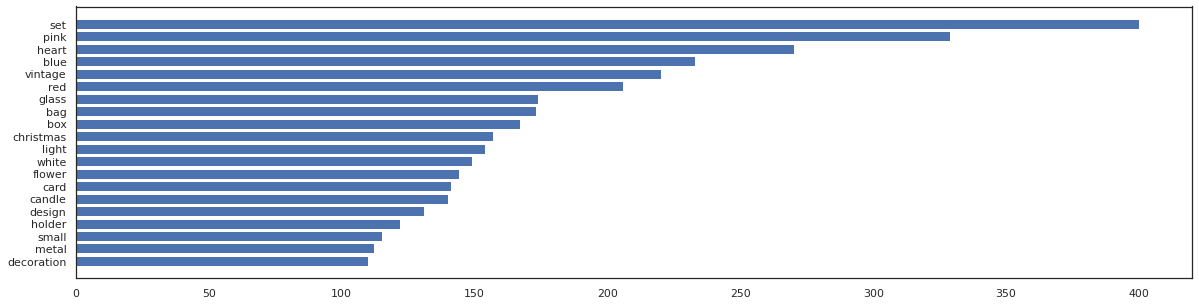

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist

all_words = ' '.join([text for text in df['Description_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
words_df = words_df.nlargest(columns="count", n = 20)
words_df.sort_values('count', inplace = True)
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

In bag of words we're using TFIDF to convert description column to Numbers

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
san = tfidf.fit_transform(df.Description_processed).toarray()
featureNames = tfidf.get_feature_names()

The numbers looks like this

In [98]:
san

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [99]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns


Now we are importing kmeans which is unsupervised learning

In [100]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

we're using kmeans to find the no of clusters that is similar group of products

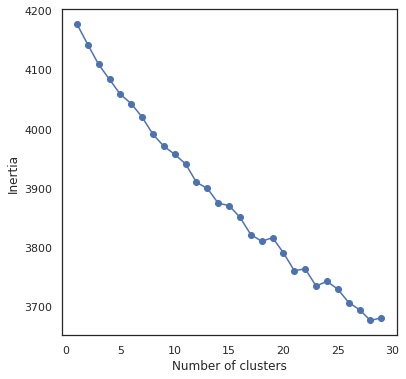

In [101]:
inertias = []
list_k = list(range(1, 30))
for k in list_k:
  km = KMeans(n_clusters=k)
  km.fit(san)
  inertias.append(km.inertia_)
plt.figure(figsize=(6,6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters')
plt.ylabel('Inertia');
plt.show()

We've found the number of clusters is approximately 17 so there are 17 similar products

so we are doing one hot encoding to the Description column

In [102]:
dummies = pd.get_dummies(dforiginal.Description)
dummies

,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541907,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


And we're Merging the encoded columns to the original dataset

In [103]:
merged = pd.concat([dforiginal,dummies],axis='columns')
merged

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0,0,...,0,0,0,0,0,0,0,0,0,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,0,...,0,0,0,0,0,0,0,0,0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0,0,...,0,0,0,0,0,0,0,0,0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,0,...,0,0,0,0,0,0,0,0,0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,0,0,...,0,0,0,0,0,0,0,0,0,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,0,0,...,0,0,0,0,0,0,0,0,0,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,0,0,...,0,0,0,0,0,0,0,0,0,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,0,0,...,0,0,0,0,0,0,0,0,0,0


Grouping the customer id and creating a new dataframe

In [104]:
sa = dforiginal.groupby('CustomerID') 
sa


we're accessing a new grouped CustomerID_dforiginal dataframe

In [105]:
for CustomerID, CustomerID_dforiginal in sa:
  print(CustomerID)
  print(CustomerID_dforiginal)


Streaming output truncated to the last 5000 lines.
469153    576587     23583            LUNCH BAG PAISLEY PARK           5   
469154    576587     21891    TRADITIONAL WOODEN SKIPPING ROPE        20   
469155    576587     21889              WOODEN BOX OF DOMINOES        20   
469156    576587    51014C              FEATHER PEN,COAL BLACK        24   
469157    576587     23365   SET 12 COLOUR PENCILS LOVE LONDON        24   
469158    576587     22620         4 TRADITIONAL SPINNING TOPS        20   
469159    576587     23483   HANGING  BUTTERFLY T-LIGHT HOLDER         6   
469160    576587     22178     VICTORIAN GLASS HANGING T-LIGHT        12   

             InvoiceDate  UnitPrice  CustomerID         Country  
449051   11/8/2011 13:31       0.83     18123.0  United Kingdom  
449052   11/8/2011 13:31       0.83     18123.0  United Kingdom  
449053   11/8/2011 13:31       2.10     18123.0  United Kingdom  
449054   11/8/2011 13:31       1.25     18123.0  United Kingdom  
449055   1

for example we access the one customerid that is: 18138

In [106]:
sa.get_group(18138)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
93898,544317,20837,FRENCH FLORAL CUSHION COVER,12,2/17/2011 14:51,2.95,18138.0,United Kingdom
93899,544317,21621,VINTAGE UNION JACK BUNTING,1,2/17/2011 14:51,8.50,18138.0,United Kingdom
93900,544317,47566,PARTY BUNTING,2,2/17/2011 14:51,4.95,18138.0,United Kingdom
93901,544317,47341A,FUSCHIA TABLE RUN FLOWER,2,2/17/2011 14:51,3.75,18138.0,United Kingdom
93902,544317,22423,REGENCY CAKESTAND 3 TIER,1,2/17/2011 14:51,12.75,18138.0,United Kingdom
93903,544317,22178,VICTORIAN GLASS HANGING T-LIGHT,12,2/17/2011 14:51,1.25,18138.0,United Kingdom
93904,544317,21629,SQUARE FLOOR CUSHION VINTAGE RED,6,2/17/2011 14:51,7.95,18138.0,United Kingdom
93905,544317,82484,WOOD BLACK BOARD ANT WHITE FINISH,2,2/17/2011 14:51,7.95,18138.0,United Kingdom


we add the encoded columns

In [107]:
dummies.sum()

 4 PURPLE FLOCK DINNER CANDLES     41
 50'S CHRISTMAS GIFT BAG LARGE    130
 DOLLY GIRL BEAKER                181
 I LOVE LONDON MINI BACKPACK       88
 I LOVE LONDON MINI RUCKSACK        1
                                 ... 
wrongly marked carton 22804         1
wrongly marked. 23343 in box        1
wrongly sold (22719) barcode        1
wrongly sold as sets                1
wrongly sold sets                   1
Length: 4223, dtype: int64

we visualizing the new dataframe

In [108]:
CustomerID_dforiginal

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
198716,554065,22755,SMALL PURPLE BABUSHKA NOTEBOOK,12,5/22/2011 10:39,0.85,18287.0,United Kingdom
198717,554065,22754,SMALL RED BABUSHKA NOTEBOOK,12,5/22/2011 10:39,0.85,18287.0,United Kingdom
198718,554065,22753,SMALL YELLOW BABUSHKA NOTEBOOK,12,5/22/2011 10:39,0.85,18287.0,United Kingdom
198719,554065,22756,LARGE YELLOW BABUSHKA NOTEBOOK,12,5/22/2011 10:39,1.25,18287.0,United Kingdom
198720,554065,22758,LARGE PURPLE BABUSHKA NOTEBOOK,12,5/22/2011 10:39,1.25,18287.0,United Kingdom
...,...,...,...,...,...,...,...,...
392752,570715,22419,LIPSTICK PEN RED,12,10/12/2011 10:23,0.42,18287.0,United Kingdom
392753,570715,22866,HAND WARMER SCOTTY DOG DESIGN,12,10/12/2011 10:23,2.10,18287.0,United Kingdom
423939,573167,23264,SET OF 3 WOODEN SLEIGH DECORATIONS,36,10/28/2011 9:29,1.25,18287.0,United Kingdom
423940,573167,21824,PAINTED METAL STAR WITH HOLLY BELLS,48,10/28/2011 9:29,0.39,18287.0,United Kingdom


Deleting the stockcode column in the CustomerID_dforiginal dataframe

In [109]:
del CustomerID_dforiginal['StockCode']

Deleting the InvoiceDate column in the CustomerID_dforiginal dataframe

In [110]:
del CustomerID_dforiginal['InvoiceDate']

Deleting the InvoiceNo column in the CustomerID_dforiginal dataframe

In [112]:
del CustomerID_dforiginal['InvoiceNo']

After Deleting the coloumns the dataframe looks like this

In [113]:
CustomerID_dforiginal

,Description,Quantity,UnitPrice,CustomerID,Country
198716,SMALL PURPLE BABUSHKA NOTEBOOK,12,0.85,18287.0,United Kingdom
198717,SMALL RED BABUSHKA NOTEBOOK,12,0.85,18287.0,United Kingdom
198718,SMALL YELLOW BABUSHKA NOTEBOOK,12,0.85,18287.0,United Kingdom
198719,LARGE YELLOW BABUSHKA NOTEBOOK,12,1.25,18287.0,United Kingdom
198720,LARGE PURPLE BABUSHKA NOTEBOOK,12,1.25,18287.0,United Kingdom
...,...,...,...,...,...
392752,LIPSTICK PEN RED,12,0.42,18287.0,United Kingdom
392753,HAND WARMER SCOTTY DOG DESIGN,12,2.10,18287.0,United Kingdom
423939,SET OF 3 WOODEN SLEIGH DECORATIONS,36,1.25,18287.0,United Kingdom
423940,PAINTED METAL STAR WITH HOLLY BELLS,48,0.39,18287.0,United Kingdom
